---

### Essential Libraries

Begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  


In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df2 = pd.read_csv(io.BytesIO(uploaded['sg_commercial_data.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving sg_commercial_data.csv to sg_commercial_data.csv


---

## Setup : Import the Dataset

Dataset on Commercia Property : Attached file `sg_commercia_data.csv`     




In [ ]:
propertyData = pd.read_csv('sg_commercial_data.csv')
propertyData.head()


,S/N,Location,Building Class,Floor Area (Sqm),Median Rent (Sqm),Reference Period
0,1,Central Area,Category 1,100 & Below,107.08,Q1 2012
1,2,Central Area,Category 1,>100 - 200,96.88,Q1 2012
2,3,Central Area,Category 1,>1000,110.33,Q1 2012
3,4,Central Area,Category 1,>200 - 500,97.60,Q1 2012
4,5,Central Area,Category 1,>500 - 1000,97.95,Q1 2012


In [ ]:
propertyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S/N                880 non-null    int64  
 1   Location           880 non-null    object 
 2   Building Class     880 non-null    object 
 3   Floor Area (Sqm)   880 non-null    object 
 4   Median Rent (Sqm)  725 non-null    float64
 5   Reference Period   880 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.4+ KB


* There are `6` variables/features/columns and `886` observations/samples/rows in the dataset.         
* There are `1` variables identified as `float64` by default, and it seems they are indeed Numeric.
* There are `1` variables identified as `object` by default, and it seems they are Numeric.     
* There are `4` variables identified as `object` by default, and they are most likely Categorical.      
* There are missing value in `Median Rent (Sqm)`.

---
## Exploratory Data Analysis

Let us start by exploring the variable `Building Class`, it shows the class of the building.

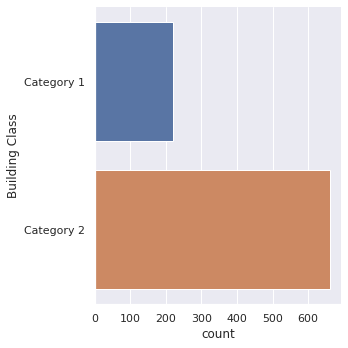

In [ ]:
sb.catplot(y = 'Building Class', data = propertyData, kind = "count")

We can see there are many category 2 building.

In [ ]:
count1, count2 = propertyData['Building Class'].value_counts()
print("Ratio of classes is Category 1 : Category 2 = ", count2, ":", count1)

Ratio of classes is Category 1 : Category 2 =  220 : 660


In [ ]:
propertyData['Median Rent (Sqm)'].describe()

count    725.000000
mean      70.345393
std       22.711917
min       13.300000
25%       53.280000
50%       65.190000
75%       93.670000
max      124.320000
Name: Median Rent (Sqm), dtype: float64

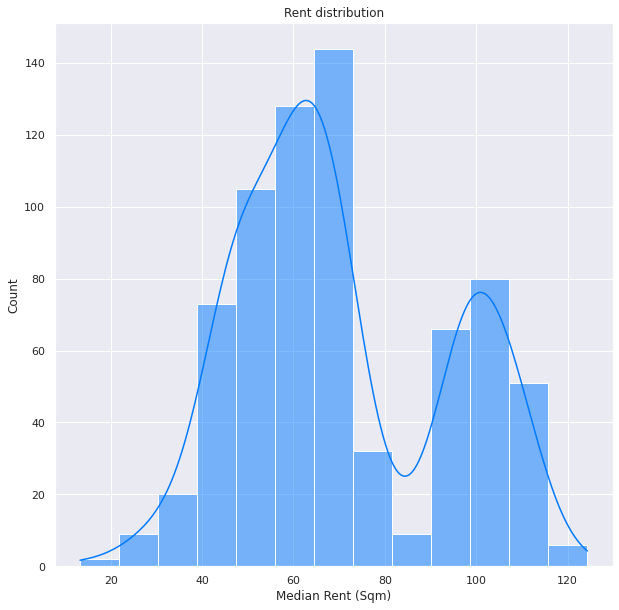

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sb.histplot(propertyData['Median Rent (Sqm)'],kde=True, color="#007aff");
ax.set(ylabel="Count")
ax.set(xlabel="Median Rent (Sqm)")
ax.set(title="Rent distribution")
plt.show()

In [ ]:
propertyData[['Location','Building Class','Floor Area (Sqm)','Reference Period']].describe()

,Location,Building Class,Floor Area (Sqm),Reference Period
count,880,880,880,880
unique,3,2,5,44
top,Central Area,Category 2,100 & Below,Q1 2012
freq,440,660,176,20


* Median Rent shows the most reasonable rent price.    
* There are 4 categorical variables.          
* History has 3 places, with the central area seem to be the majority (440).     
* Most building are under category 2(660).      
* Floor Area has 5 levels, 100 & Below are the most ppopular type of floor area on the market.
* Reference Period shows the most renting record during Q1 2012 (20). 

### Predictors corresponding to the Rent 

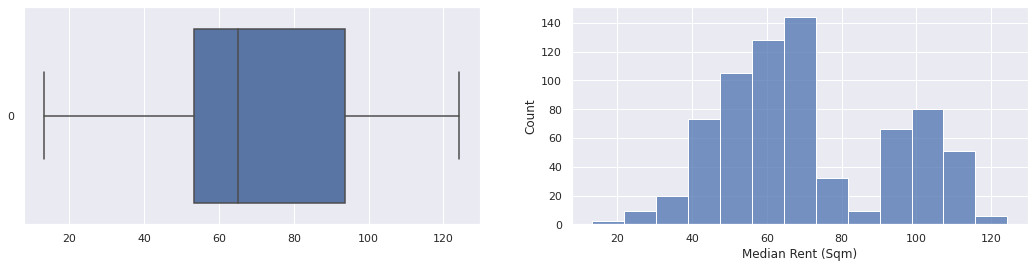

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = propertyData['Median Rent (Sqm)'], orient = "h", ax = axes[0])
sb.histplot(data = propertyData['Median Rent (Sqm)'], ax = axes[1])

* The majority of the price are fall between 50 to 90.
* The median price is around 65

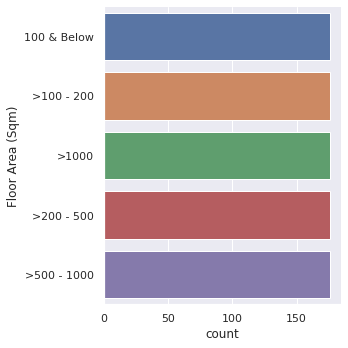

In [ ]:
sb.catplot(y = 'Floor Area (Sqm)', data = propertyData, kind = "count")

The type of the floor area are equally the same.

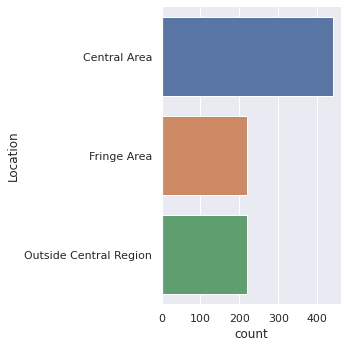

In [ ]:
sb.catplot(y = 'Location', data = propertyData, kind = "count")

Most of the offices are at the central area.

### Relationship with Rent

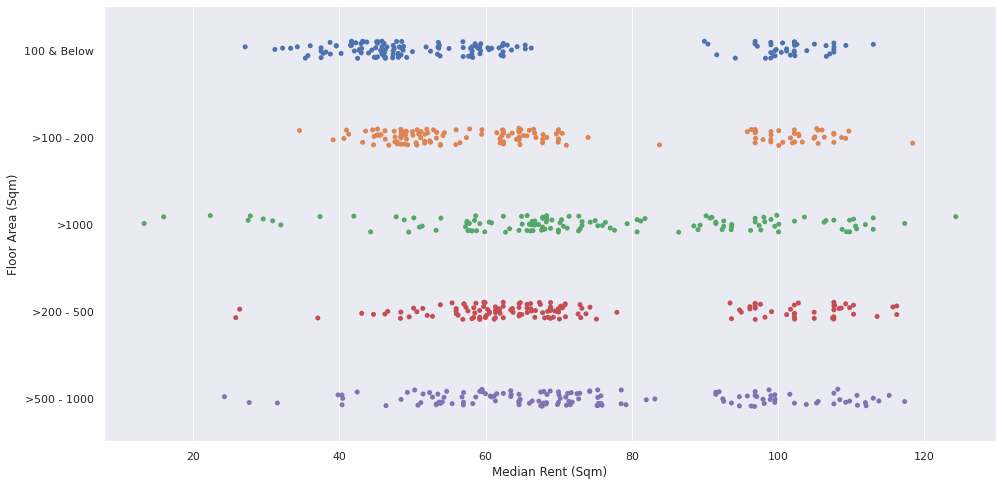

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Median Rent (Sqm)', y = 'Floor Area (Sqm)', data = propertyData)

We can see that there is a gap between each categories of the floor area.

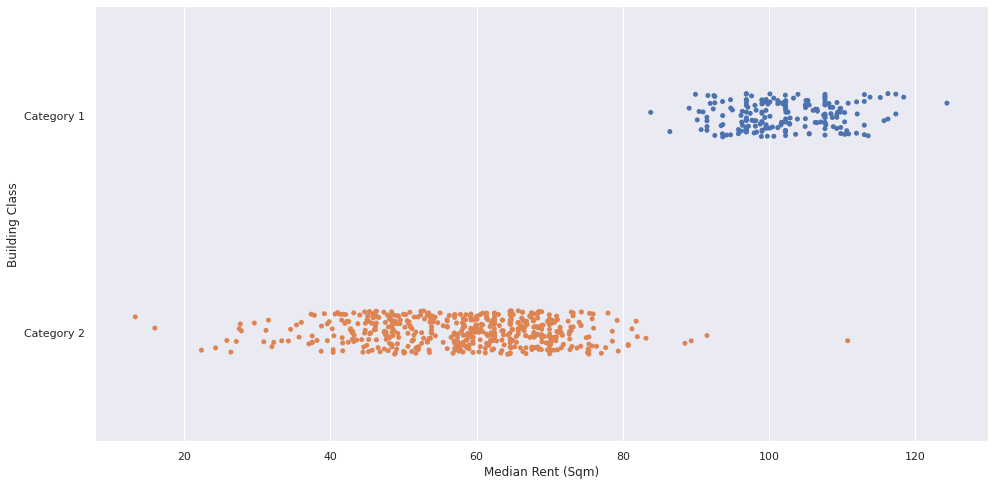

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Median Rent (Sqm)', y = 'Building Class', data = propertyData)

We can see that the rent under Category 2 is usually lower then Category 1. This could be why there is a gap for Median Rent to Floor Area graph

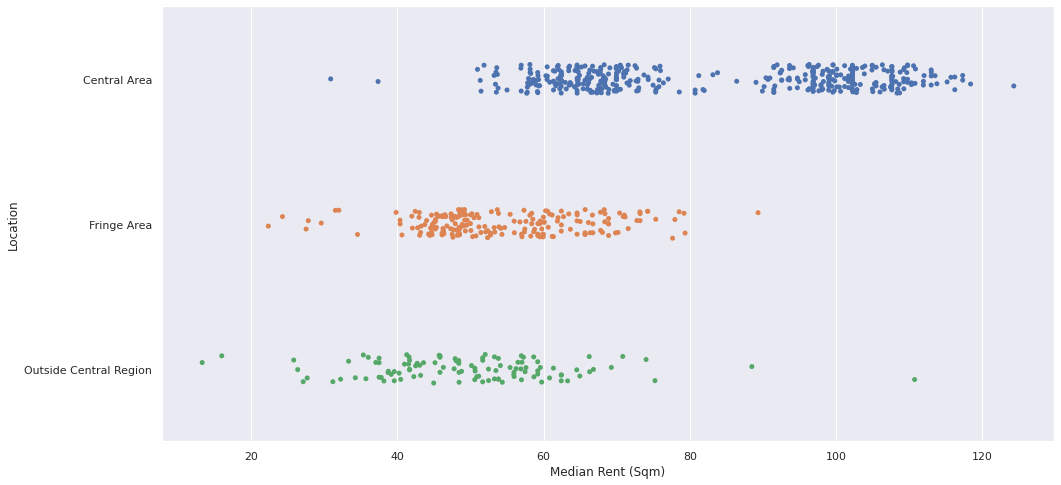

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Median Rent (Sqm)', y = 'Location', data = propertyData)

The rent of the office at the central area are higher then the others.

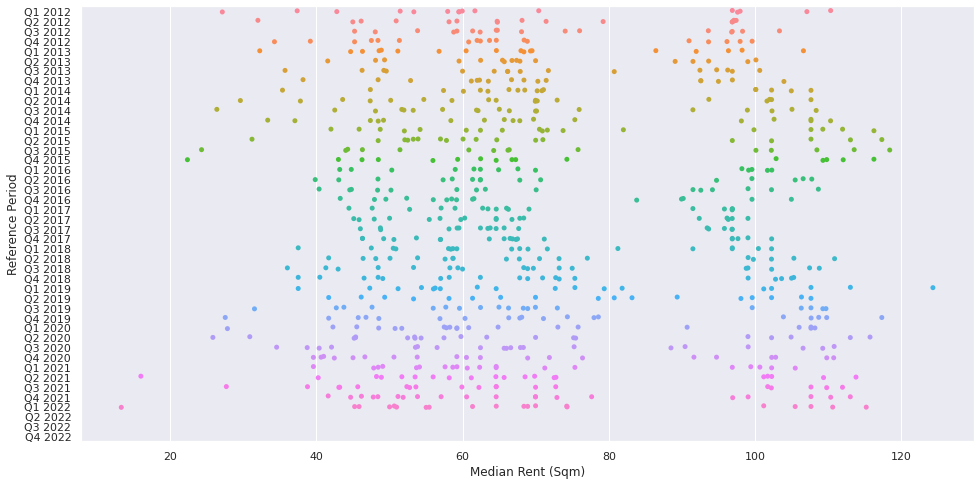

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Median Rent (Sqm)', y = 'Reference Period', data = propertyData)

We can see that the dots are slightly move toward to the right, which means the rent are increasing over the period.

### Complex Relationships with Median Rent

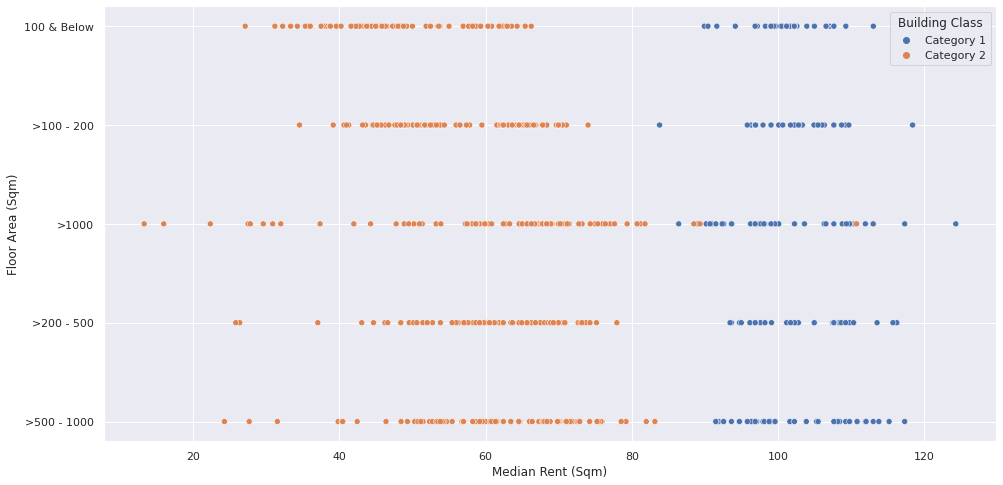

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x = 'Median Rent (Sqm)', y = 'Floor Area (Sqm)', hue = 'Building Class', data = propertyData)

This graph prove that theeven though the fllor area are the same, rent can still be affected by the building class.

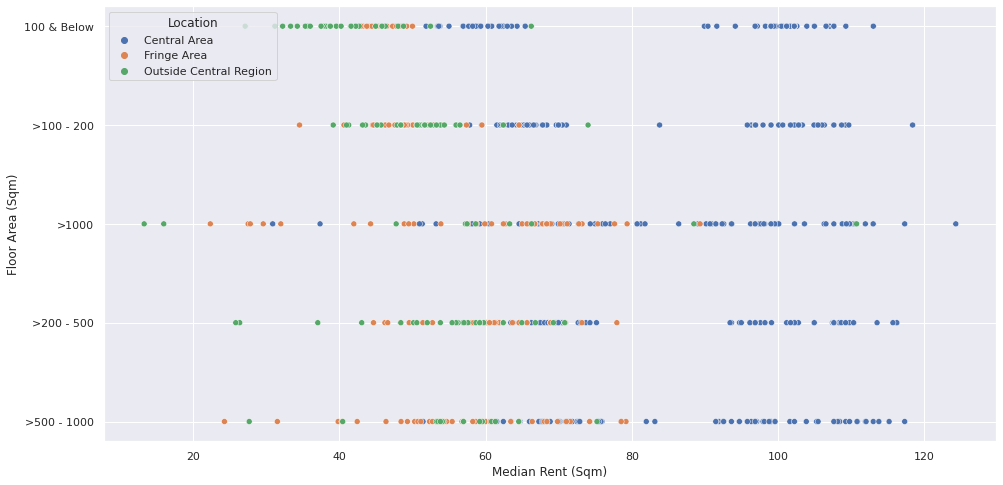

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x = 'Median Rent (Sqm)', y = 'Floor Area (Sqm)', hue = 'Location', data = propertyData)

We can see that category1 building are mostly located at central area and they have higher rent.

---

## Clean the Dataset

Find the missing values in data and fill in.

In [ ]:
propertyDataClean = propertyData.copy()
propertyDataClean.isnull().sum()

S/N                    0
Location               0
Building Class         0
Floor Area (Sqm)       0
Median Rent (Sqm)    155
Reference Period       0
dtype: int64

In [ ]:
propertyDataClean['Median Rent (Sqm)'].fillna(value = 0.1, inplace = True)
propertyDataClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S/N                880 non-null    int64  
 1   Location           880 non-null    object 
 2   Building Class     880 non-null    object 
 3   Floor Area (Sqm)   880 non-null    object 
 4   Median Rent (Sqm)  880 non-null    float64
 5   Reference Period   880 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.4+ KB


In [ ]:
print(propertyDataClean['Median Rent (Sqm)'])

0      107.08
1       96.88
2      110.33
3       97.60
4       97.95
        ...  
875      0.10
876      0.10
877      0.10
878      0.10
879      0.10
Name: Median Rent (Sqm), Length: 880, dtype: float64


In [ ]:
propertyDataClean['Median Rent (Sqm)']=pd.cut(propertyDataClean['Median Rent (Sqm)'],bins=[0,13.3,24.402,35.504,46.606,57.708,68.81,79.912,91.014,102.116,113.218,124.32,135.224],labels=['0<price<13.3','13.3<price<24.4','24.4<price<35.5','35.5<price<46.6','46.6<price<57.7','57.7<price<68.8','68.8<price<79.9','79.9<price<91.0','91.0<price<102.1','102.1<price<113.2','113.2<price<124.3','123.4<price'])

In [ ]:
print(propertyDataClean['Median Rent (Sqm)'])

0      102.1<price<113.2
1       91.0<price<102.1
2      102.1<price<113.2
3       91.0<price<102.1
4       91.0<price<102.1
             ...        
875         0<price<13.3
876         0<price<13.3
877         0<price<13.3
878         0<price<13.3
879         0<price<13.3
Name: Median Rent (Sqm), Length: 880, dtype: category
Categories (12, object): ['0<price<13.3' < '13.3<price<24.4' < '24.4<price<35.5' < '35.5<price<46.6' <
                          ... < '91.0<price<102.1' < '102.1<price<113.2' <
                          '113.2<price<124.3' < '123.3<price']


---

## Creating a Model for Rating : Attempt 1

convert categorical predictors to integers

In [ ]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
propertyData_cat = propertyDataClean[['Location','Floor Area (Sqm)','Building Class']]



ohe.fit(propertyData_cat)
propertyData_cat_ohe = pd.DataFrame(ohe.transform(propertyData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(propertyData_cat.columns))

# Check the encoded variables
propertyData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Location_Central Area            880 non-null    float64
 1   Location_Fringe Area             880 non-null    float64
 2   Location_Outside Central Region  880 non-null    float64
 3   Floor Area (Sqm)_100 & Below     880 non-null    float64
 4   Floor Area (Sqm)_>100 - 200      880 non-null    float64
 5   Floor Area (Sqm)_>1000           880 non-null    float64
 6   Floor Area (Sqm)_>200 - 500      880 non-null    float64
 7   Floor Area (Sqm)_>500 - 1000     880 non-null    float64
 8   Building Class_Category 1        880 non-null    float64
 9   Building Class_Category 2        880 non-null    float64
dtypes: float64(10)
memory usage: 68.9 KB


In [ ]:
# Combining Numeric features with the OHE Categorical features
propertyData_num = propertyDataClean['S/N']
propertyData_res = propertyDataClean['Median Rent (Sqm)']
propertyData_ohe = pd.concat([propertyData_num, propertyData_cat_ohe, propertyData_res], 
                           sort = False, axis = 1).reindex(index=propertyData_num.index)

# Check the final dataframe
propertyData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   S/N                              880 non-null    int64   
 1   Location_Central Area            880 non-null    float64 
 2   Location_Fringe Area             880 non-null    float64 
 3   Location_Outside Central Region  880 non-null    float64 
 4   Floor Area (Sqm)_100 & Below     880 non-null    float64 
 5   Floor Area (Sqm)_>100 - 200      880 non-null    float64 
 6   Floor Area (Sqm)_>1000           880 non-null    float64 
 7   Floor Area (Sqm)_>200 - 500      880 non-null    float64 
 8   Floor Area (Sqm)_>500 - 1000     880 non-null    float64 
 9   Building Class_Category 1        880 non-null    float64 
 10  Building Class_Category 2        880 non-null    float64 
 11  Median Rent (Sqm)                880 non-null    category
dtypes: categ

---

## Create a Model : Attempt 1

[Text(0.5, 0.8333333333333334, 'Building Class_Category 2 <= 0.5\ngini = 0.858\nsamples = 616\nvalue = [104, 69, 7, 1, 10, 57, 95, 130, 63, 10, 70]\nclass = 79.9<price<91.0'),
 Text(0.25, 0.5, 'S/N <= 407.5\ngini = 0.63\nsamples = 161\nvalue = [12, 68, 7, 0, 0, 0, 0, 0, 0, 5, 69]\nclass = 113.2<price<124.3'),
 Text(0.125, 0.16666666666666666, 'gini = 0.574\nsamples = 149\nvalue = [0, 68, 7, 0, 0, 0, 0, 0, 0, 5, 69]\nclass = 113.2<price<124.3'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]\nclass = 0<price<13.3'),
 Text(0.75, 0.5, 'S/N <= 403.0\ngini = 0.798\nsamples = 455\nvalue = [92, 1, 0, 1, 10, 57, 95, 130, 63, 5, 1]\nclass = 79.9<price<91.0'),
 Text(0.625, 0.16666666666666666, 'gini = 0.567\nsamples = 134\nvalue = [0, 0, 0, 0, 0, 0, 12, 78, 39, 4, 1]\nclass = 79.9<price<91.0'),
 Text(0.875, 0.16666666666666666, 'gini = 0.787\nsamples = 321\nvalue = [92, 1, 0, 1, 10, 57, 83, 52, 24, 1, 0]\nclass = 0<price<13.3')]

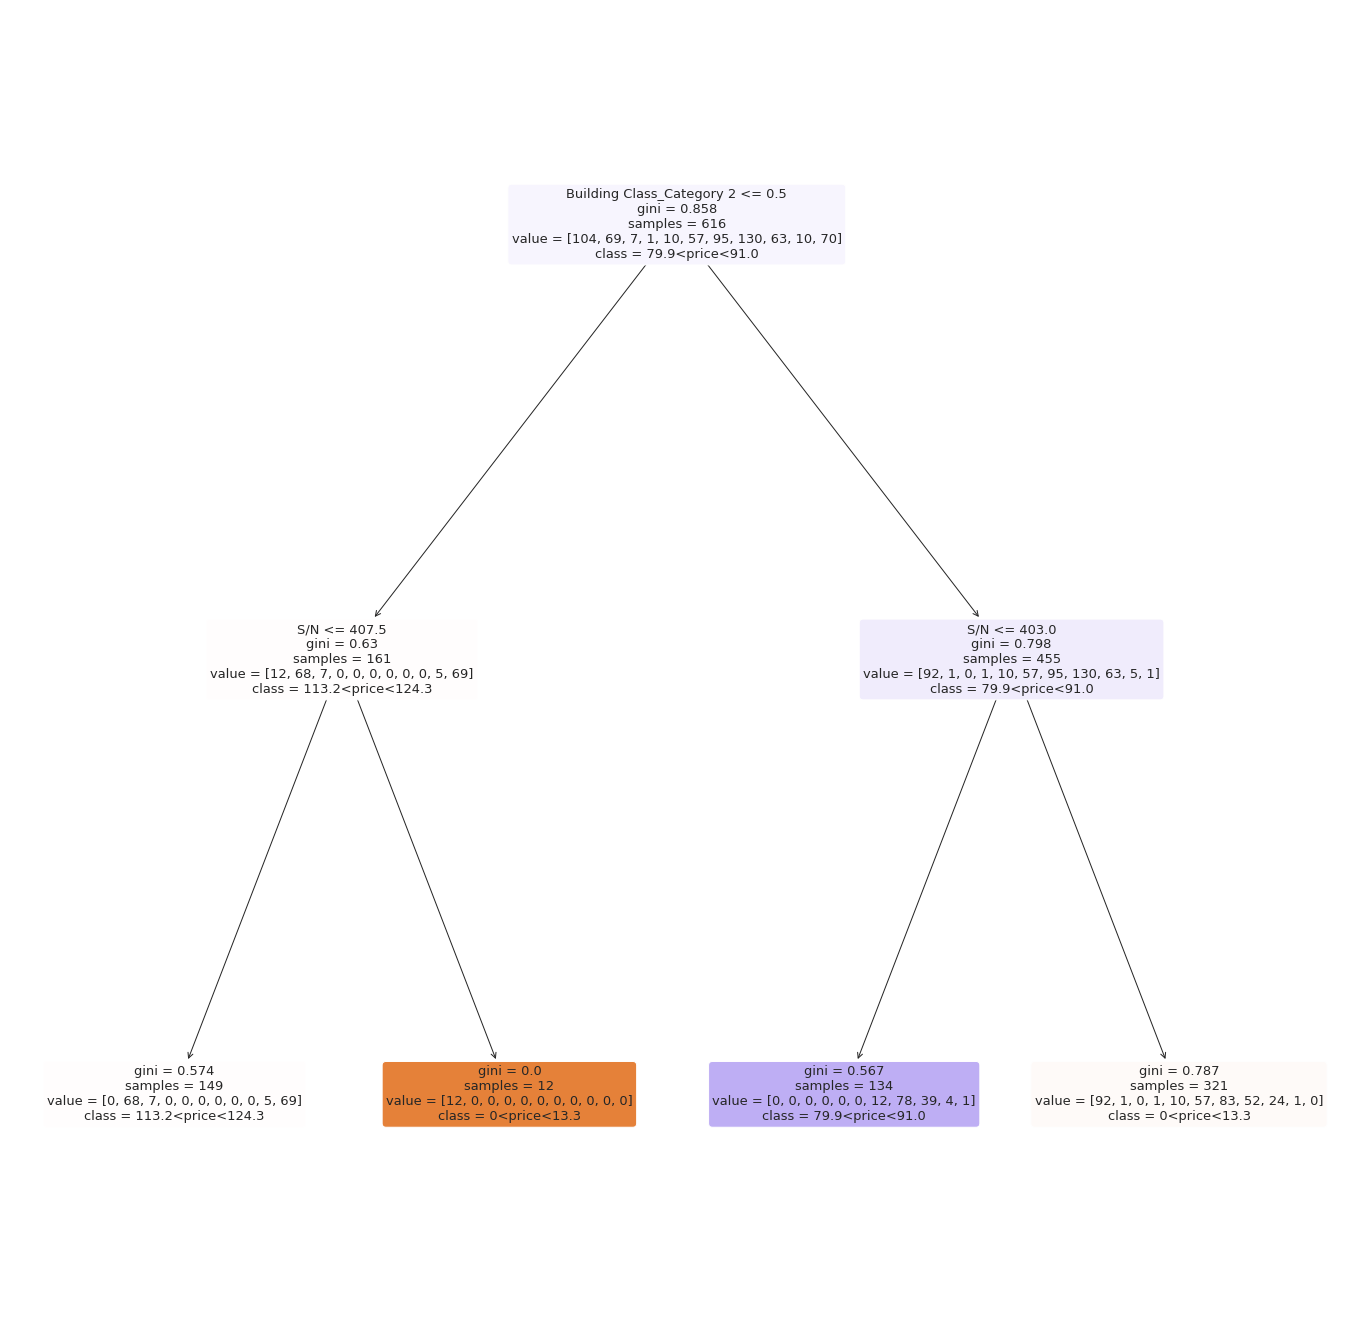

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(propertyData_ohe['Median Rent (Sqm)'])
X = pd.DataFrame(propertyData_ohe.drop('Median Rent (Sqm)', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=['0<price<13.3','13.3<price<24.4',
                       '24.4<price<35.5','35.5<price<46.6',
                       '46.6<price<57.7','57.7<price<68.8',
                       '68.8<price<79.9','79.9<price<91.0',
                       '91.0<price<102.1','102.1<price<113.2',
                       '113.2<price<124.3','123.4<price'])

### Check the accuracy of the Model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.4074675324675325

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4621212121212121



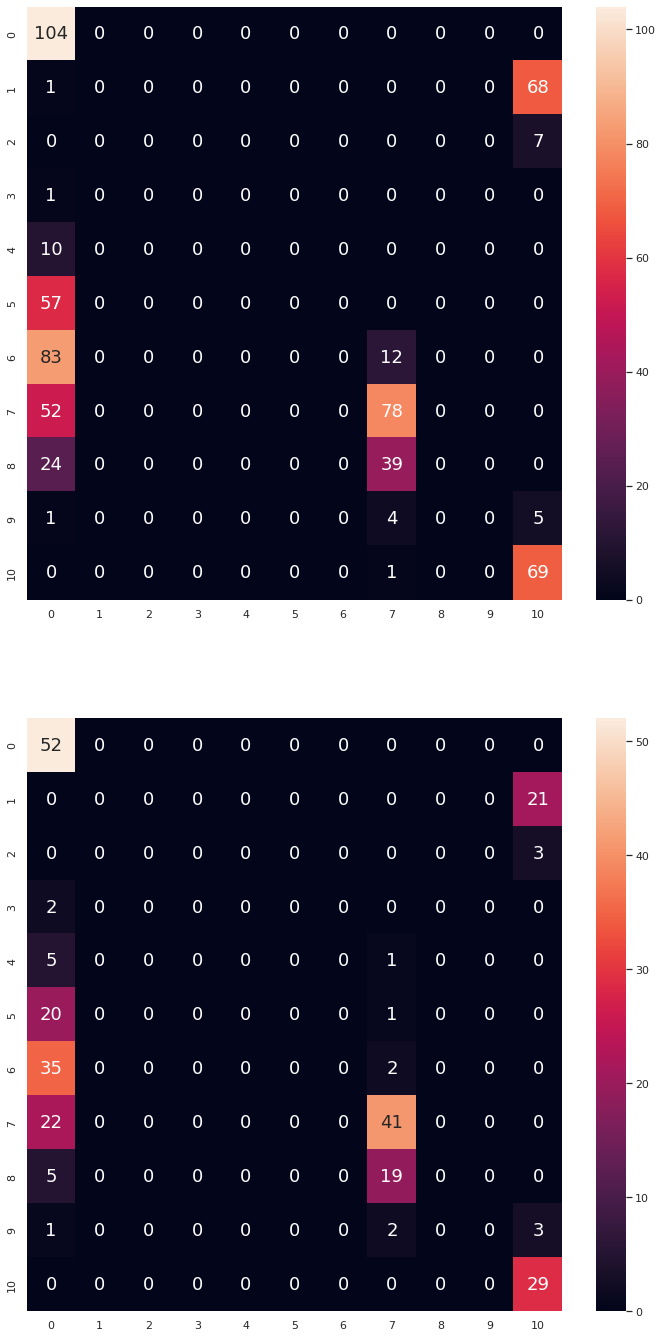

In [ ]:
#Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

---

## Create a Model : Attempt 2

using RandomForest

In [ ]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(propertyData_ohe['Median Rent (Sqm)'])
X = pd.DataFrame(propertyData_ohe.drop('Median Rent (Sqm)', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 200,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train['Median Rent (Sqm)'].ravel())

RandomForestClassifier(max_depth=10, n_estimators=200)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6753246753246753

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6628787878787878



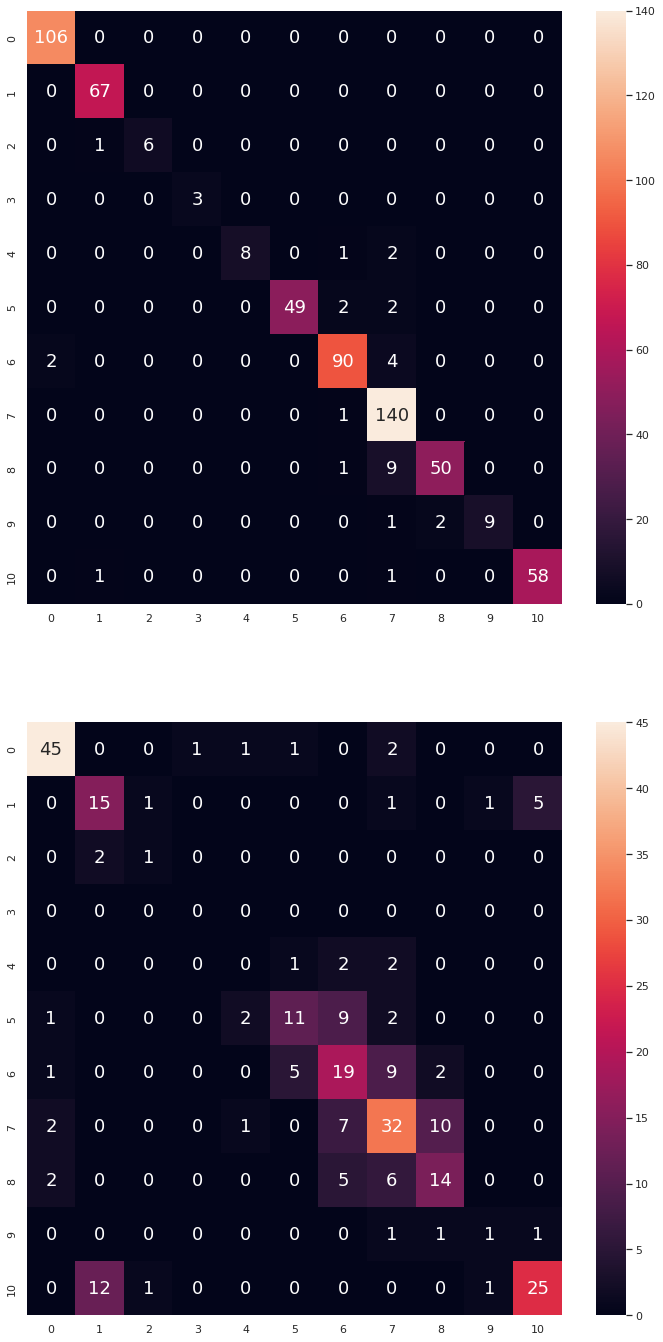

In [ ]:
#Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

---
## Creating a Model for Rating : Attempt 3

Try out a basic set of tools for Cross-Validation

In [ ]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(propertyData_ohe['Median Rent (Sqm)'])
X = pd.DataFrame(propertyData_ohe.drop('Median Rent (Sqm)', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,880,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train['Median Rent (Sqm)'].ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


KeyboardInterrupt: ignored

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

AttributeError: ignored

### Use the Best Model found through GridSearchCV

In [ ]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(propertyData_ohe['Median Rent (Sqm)'])
X = pd.DataFrame(propertyData_ohe.drop('Median Rent (Sqm)', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 200,  # n_estimators denote number of trees
                                 max_depth = 7)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train['Median Rent (Sqm)'].ravel())

RandomForestClassifier(max_depth=7, n_estimators=200)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6818181818181818

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6477272727272727



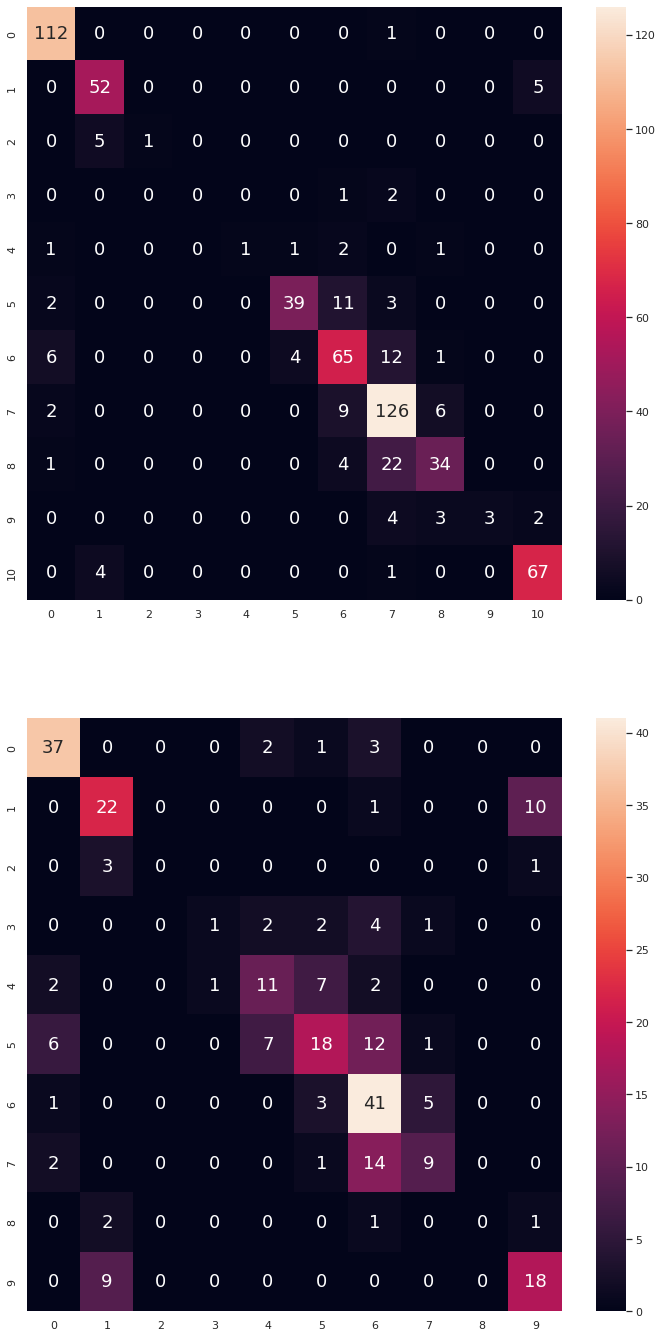

In [ ]:
#Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])